# Nearest Neighbors Exercises

In [ ]:
import numpy as np
import pandas as po
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

## Problem 1

Consider the following simple data-set:

<img src="https://github.com/BeaverWorksMedlytics2020/Data_Public/raw/master/Images/Week1/knn_notebook_example_table.png" alt="Example Table" width="600">

Now consider the Sample:
    $$X= 4, Y = 4, Z = 2$$

Using kNN, what is the class for this sample for $k = 1$ and $k = 3?$ Use the Eucledian metric.

Sample: \
S1: sqrt((1) + (0) + (1)) --> sqrt(2)\
S2: sqrt((9) + (4) + (0)) --> sqrt(13)\
S3: sqrt((9) + (4) + (1)) --> sqrt(14)

k = 1 --> class = 1\
k = 3 --> class = 2


## Problem 2
Earlier in the tutorial we were told that kNN depends on several factors, one of them being $k$. Consider the following datasets below, find the optimal value of $k$ that gives the highest accuracy. Visualize your data! Can you come up with some rule for getting a good idea of what $k$ is? 

HINT: look for a pattern/bound! Answer should be in terms of the size of the dataset $n$. 

In [ ]:
# Solve this problem for each of these datasets
from sklearn.datasets import load_iris 
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_wine 

# Load those datasets into some easily accessible variables
# The datasets are already normalized, so that saves us some steps!
iris = load_iris()                    #iris dataset: size = 150
breast_cancer = load_breast_cancer()  #diabetes dataset: size = 569
wine = load_wine()                    #wine dataset: size 178

# This function will perfom KNN classification for a specified k
def split_train_test_dataset(dataset, k, test_size=0.2):
    """Loads and performs KNN classification on the provided dataset"""
    # Grab and split the dataset
    X_train, X_val, y_train, y_val = train_test_split(
        dataset.data, dataset.target, test_size=test_size, random_state=0)

    # Build a KNN classifier, fit it and test its predictions
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    print("Validation Accuracy is {:5.1%}".format(
        accuracy_score(y_val, knn.predict(X_val))))
    return accuracy_score(y_val, knn.predict(X_val))


2
Validation Accuracy is 75.0%
3
Validation Accuracy is 77.8%
4
Validation Accuracy is 75.0%
5
Validation Accuracy is 80.6%
6
Validation Accuracy is 75.0%
7
Validation Accuracy is 77.8%
8
Validation Accuracy is 69.4%
9
Validation Accuracy is 75.0%
10
Validation Accuracy is 72.2%
11
Validation Accuracy is 72.2%
12
Validation Accuracy is 69.4%
13
Validation Accuracy is 75.0%
14
Validation Accuracy is 72.2%
15
Validation Accuracy is 72.2%
16
Validation Accuracy is 75.0%
17
Validation Accuracy is 77.8%
18
Validation Accuracy is 75.0%
19
Validation Accuracy is 77.8%
20
Validation Accuracy is 77.8%
21
Validation Accuracy is 75.0%
22
Validation Accuracy is 75.0%
23
Validation Accuracy is 75.0%
24
Validation Accuracy is 75.0%
25
Validation Accuracy is 75.0%
26
Validation Accuracy is 75.0%
27
Validation Accuracy is 75.0%
28
Validation Accuracy is 75.0%
29
Validation Accuracy is 75.0%
30
Validation Accuracy is 75.0%
31
Validation Accuracy is 75.0%
32
Validation Accuracy is 75.0%
33
Validation Ac

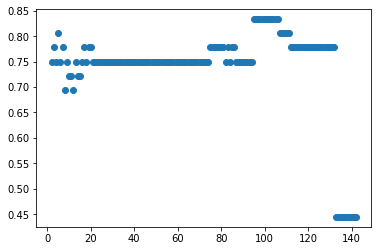

In [ ]:
# YOUR CODE HERE
# iris: 6 - 26; size = 150 --> 21
# breast cancer: 9, 11 - 26, 28, 30; size = 569 --> 19
# wine: 95 - 106; size = 178 --> 22
y = []
for k in range(2,143):
    print(k)
    y.append(split_train_test_dataset(wine, k, test_size=0.2))

plt.scatter(range(2,143),y)



Write a single mathematical expression describing the relationship you found between $n$ (the size of the dataset) and $k$ (the number of datapoints used to classify each validation datum).

k = sqrt(n)

## Problem 3
Now, we will **be writing our k-NNA**. Recall that we said a kNN is comprised of a predictions and using those predictions to classify the data. Here we will try to mimic sklearn's kNN methods. We will be using the Pima diabetes dataset. 

### Loading and splitting data

In [ ]:
url = "https://github.com/BeaverWorksMedlytics2020/Data_Public/raw/master/NotebookExampleData/Week1/diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = po.read_csv(url, names=names)

# Dropping NaN rows
invalid = ['plas', 'pres', 'skin', 'test', 'mass']

for i in invalid:
    data[i].replace(to_replace=0, value=np.nan, inplace=True)
    
data = data.dropna(axis=0).reset_index(drop=True)

Now, let's clearly define which columns will act as explanatory variables, and which column will be the target value, and split the dataset between your training data and testing data. Let's try an 80-20 split and use sklearn's [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) method (set random_state = 0 so we get the same output each time).

In [ ]:
# Columns we will use to make predictions with (features!) feel free to play around with these
X_cols = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']

# Column that we want to predict (the labels)
y_col = 'class'

# 80-20 train-test split of datset
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(data[X_cols], data[y_col], test_size=test_size, random_state=0)

# Further split X and y of training into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=test_size, random_state=0)

print('There are {} training samples with {} features and {} associated classification labels'.format(*X_train.shape, *y_train.shape))
print('There are {} validation samples with {} features and {} associated classification labels'.format(*X_val.shape, *y_val.shape))
print('There are {} test samples with {} features and {} associated classification labels'.format(*X_test.shape, *y_test.shape))

There are 250 training samples with 8 features and 250 associated classification labels
There are 63 validation samples with 8 features and 63 associated classification labels
There are 79 test samples with 8 features and 79 associated classification labels


### Normalizing Data

Let's not forget to normalize the data! We'll use sklearn's StandardScaler normalization like we did before to normalize the training **and** validation/data.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

for i in list(X_train):
    feature_data_train = X_train[i].values.reshape(-1, 1)
    scaler.fit(feature_data_train)
    X_train[i] = scaler.transform(feature_data_train)

for j in list(X_test):
    feature_data_test = X_test[j].values.reshape(-1, 1)
    scaler.fit(feature_data_test)
    X_test[j] = scaler.transform(feature_data_test)
    
for k in list(X_val):
    feature_data_val = X_val[k].values.reshape(-1, 1)
    scaler.fit(feature_data_val)
    X_val[k] = scaler.transform(feature_data_val)

### Writing your kNN

Now for the fun part! Fill in the 3 following methods, euclidean_dist(), predict(), and knn().

The predict method that we'll make below needs to: 
1. Compute the euclidean distance between the “new” observation and all the data points in the training set. 
2. Assign the corresponding label to the observation
3. Select the k nearest ones and perform a "majority vote"

In [ ]:
# Euclidean distance function from tutorial
def euclidean_dist(datum1, datum2):
    inner_val = 0.0
    
    for g in range(datum1.shape[0]):
        inner_val += (datum1[g]- datum2[g]) ** 2
    
    distance = np.sqrt(inner_val)
    return(distance)

In [ ]:
from collections import Counter

def predict(x_training, y_training, x_test_sample, k):
    
    # Create list for distances and targets
    distances = []
    targets = []

    # YOUR CODE HERE
    for i in range(len(x_training)):
        distances.append(euclidean_dist(np.array(x_training.iloc[i]), x_test_sample))
    targets = y_training
    distplustarg = zip(distances, targets)
    res = sorted(distplustarg, key = lambda x: x[0])
    list_targets = []
    for i in range(0,k):
        list_targets.append(res[i][1])
    num_zeros = 0
    num_ones = 0
    for i in range(0, len(list_targets)):
        if(list_targets[i] == 0):
            num_zeros += 1
        else:
            num_ones += 1
    if(max(num_ones, num_zeros) == num_ones):
        return 1
    return 0

In [ ]:
def knn(x_training, y_training, x_testing, k):
    knnvals = []
    for i in range(0,len(x_testing)):
        knnvals.append(predict(x_training, y_training, x_testing.iloc[i], k))
    return knnvals

When done, test your code by running the methods here!

In [ ]:
from sklearn.metrics import accuracy_score
import time

start = time.time()
predictions_slow = knn(X_train, y_train, X_val, k=5)

print('Took {} seconds'.format(time.time() - start))
print("Validation Accuracy is ", accuracy_score(y_val,predictions_slow)*100)

Took 2.175204038619995 seconds
Validation Accuracy is  80.95238095238095


Check sklearn's predictions on validation data from the tutorial notebook and make sure they match yours. Sklearn is faster, but you should get the same answers.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=85c5176c-5414-4679-aebf-c4b41aad297f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>